In [1]:
from analysis_utils import *
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import copy

In [3]:
methods = [ 'new_neiNodeSum_1', 'degree', 'degree_random', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 
           'KMcore_g1', 'KMcore_gf', 'neiNodesNum', 'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max']
measuresDic = dict()
for net in range(1,21):
    measuresDic[net] = dict()
    for mtd in methods:
        with open(f'../MeasureValuesRanking/NodesMeasures/h_{mtd}_realNet_{net}.json', 'r') as f:
            measuresDic[net][mtd] = json.load(f)

In [4]:
# para1 expr2
rltDic_nc = dict()
mu=0.1
para = 1
expr = 2

rltDic_nc[mu] = dict()  
for net in range(1,21):
    with open(f'NonlinearHC_SIR_avg/avg_{net}_para{para}_expr{expr}_range.json', 'r') as f:
        rltDic_nc[mu][net] = json.load(f)


In [5]:
# plot the scatter plot of tau values for all methods on each network
methods_ = ['clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 
           'KMcore_g1', 'KMcore_gf', 'neiNodesNum', 'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
           'degree','new_neiNodeSum_1', ]  
mu = 0.1
colors = {'new_neiNodeSum_1':'red', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
        }
tauDic = dict()
for net in range(1,21):
    tauDic[net] = dict()
    sctterLst_x = []
    sctterLst_y = []
    for mtd in methods:
        tauDic[net][mtd] = round(caltau(rltDic_nc[mu][net], measuresDic[net][mtd], 'b'), 5)

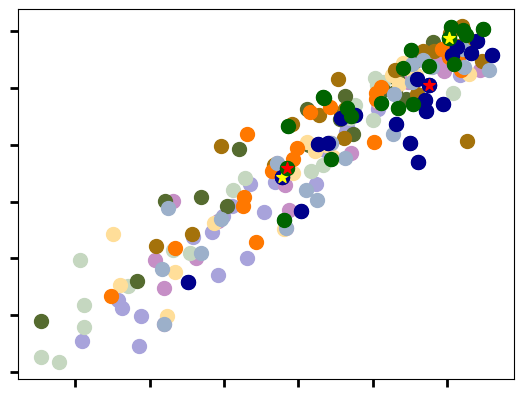

In [7]:
s1 = 100
s2 = 75
marker = 'x'
mu = 0.1
xstickD = dict()
ystickD = dict()

methods_plt = ['new_neiNodeSum_1', 'clsBetweenness', 'clsCloseness', 
               'clsKcore',  'KMcore_g1', 'KMcore_gf',
            'clsEigenvector','nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
             'degree','neiNodesNum', ]  
labels = {'new_neiNodeSum_1':'MIS', 
          'degree':'Degree',
          'clsBetweenness':'Betweenness', 
          'clsCloseness':'Closeness', 
          'clsKcore':'K-coreness', 
          'clsEigenvector':'Eigenvector', 
          'KMcore_g1':'H-coreness-R', 
          'KMcore_gf':'H-coreness-$R_w$', 
          'neiNodesNum':'NNum', 
          'nodeEdgeEigenvector_linear':'NEE_linear', 
          'nodeEdgeEigenvector_max':'NEE_max',
          }
labelsshow = {'new_neiNodeSum_1':'MIS$_{t=1}^{HC}$', 
          'degree':'Hyper-degree',
          'clsBetweenness':'2-Betweenness', 
          'clsCloseness':'2-Closeness', 
          'clsKcore':'2-K-coreness', 
          'clsEigenvector':'2-Eigenvector', 
          'KMcore_g1':'Hyper-coreness-R', 
          'KMcore_gf':'Hyper-coreness-$R_w$', 
          'neiNodesNum':'2-Degree', 
          'nodeEdgeEigenvector_linear':'Eigenvector_linear', 
          'nodeEdgeEigenvector_max':'Eigenvector_linear',
          }
colors = {'new_neiNodeSum_1':'red', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          }
xstickD = dict()
ystickD = dict()
# plt.figure(figsize=(5,5))  # ,dpi=300
for mtd_ in ['new_neiNodeSum_1']: # methods_plt:
    # plt.figure(figsize=(7,5))
    methods_copy = copy.deepcopy(methods_plt)
    methods_copy.remove(mtd_)
    methods_others = methods_copy
    tauDic = dict()
    tauDic_ms = dict()
    sctterDic= dict()
    xstickD[mtd_] = dict() 
    ystickD[mtd_] = dict()
    for mid, mtd in enumerate(methods_others):
    # for mid, mtd in enumerate(['KMcore_gf', 'neiNodesNum', 'nodeEdgeEigenvector_linear',]):
        sctterDic[mtd] = dict()
        tauDic[mtd] = dict()
        tauDic_ms[mtd] = dict()
        sctterLst_x = []
        sctterLst_y = []
        for net in range(1,21):
            tauDic[mtd][net] = round(caltau(rltDic_nc[mu][net], measuresDic[net][mtd], 'b'), 5)
            tauDic_ms[mtd][net] = round(caltau(measuresDic[net][mtd_], measuresDic[net][mtd], 'b'), 5)
            sctterDic[mtd][net] = (tauDic_ms[mtd][net], tauDic[mtd][net])
            sctterLst_x.append(tauDic_ms[mtd][net])
            sctterLst_y.append(tauDic[mtd][net])
        xstickD[mtd_][mtd] = sum(sctterLst_x)/len(sctterLst_x)
        ystickD[mtd_][mtd] = sum(sctterLst_y)/len(sctterLst_y)
        plt.scatter(sctterLst_x, sctterLst_y, label=f'{labels[mtd]}', color=colors[mtd], s=s1
                    # alpha=0.5
                    )
    for mtd in ['degree','KMcore_gf']:
        sctterDic[mtd] = dict()
        tauDic[mtd] = dict()
        tauDic_ms[mtd] = dict()
        sctterLst_x = []
        sctterLst_y = []
        for net in range(1,21):
            tauDic[mtd][net] = round(caltau(rltDic_nc[mu][net], measuresDic[net][mtd], 'b'), 5)
            tauDic_ms[mtd][net] = round(caltau(measuresDic[net][mtd_], measuresDic[net][mtd], 'b'), 5)
            sctterDic[mtd][net] = (tauDic_ms[mtd][net], tauDic[mtd][net])
            sctterLst_x.append(tauDic_ms[mtd][net])
            sctterLst_y.append(tauDic[mtd][net])
        xstickD[mtd_][mtd] = sum(sctterLst_x)/len(sctterLst_x)
        ystickD[mtd_][mtd] = sum(sctterLst_y)/len(sctterLst_y)
        plt.scatter(sctterLst_x, sctterLst_y, label=f'{labels[mtd]}', color=colors[mtd], s=s1
                    # alpha=0.5
                    )
        if mtd == 'degree':
            plt.scatter([sctterLst_x[4]], [sctterLst_y[4]], label=f'{labels[mtd]}', color=colors[mtd], s=s1
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[4]], [sctterLst_y[4]], 
                        label=f'{labels[mtd]}', s=s2,
                        color= 'yellow',   # colors[mtd], 
                        marker='*',
                        # edgecolors='yellow',
                        # linewidths=2
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[13]], [sctterLst_y[13]], label=f'{labels[mtd]}', color=colors[mtd], s=s1
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[13]], [sctterLst_y[13]], 
                        label=f'{labels[mtd]}', s=s2,
                        color= 'red',   # colors[mtd], 
                        marker='*',
                        # edgecolors='red',
                        # linewidths=2
                        # alpha=0.5
                        )
        if mtd == 'KMcore_gf':
            plt.scatter([sctterLst_x[4]], [sctterLst_y[4]], label=f'{labels[mtd]}', color=colors[mtd], s=s1
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[4]], [sctterLst_y[4]], 
                        label=f'{labels[mtd]}', s=s2,
                        color='yellow', 
                        marker='*',
                        # edgecolors='yellow',
                        # linewidths=2
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[13]], [sctterLst_y[13]], label=f'{labels[mtd]}', color=colors[mtd], s=s1
                        # alpha=0.5
                        )
            plt.scatter([sctterLst_x[13]], [sctterLst_y[13]], 
                        label=f'{labels[mtd]}', s=s2,
                        color= 'red',   # colors[mtd], 
                        marker='*',
                        )

    plt.tick_params(axis='y', labelsize=16)  
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', which='major', size=6, width=2)  
    plt.tick_params(axis='x', which='major', size=6, width=2) 
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.savefig(f'savefig_all/scatters/{mtd_}.svg', format='svg', bbox_inches='tight',dpi=300)
    plt.show()

new_neiNodeSum_1


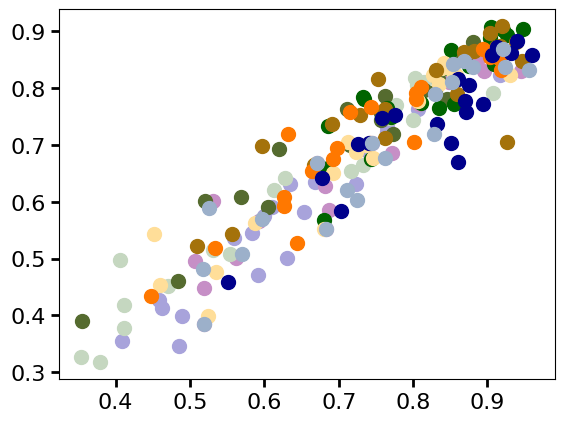

clsBetweenness


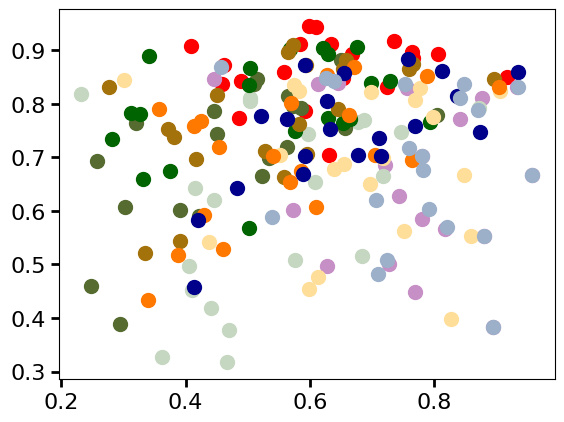

clsCloseness


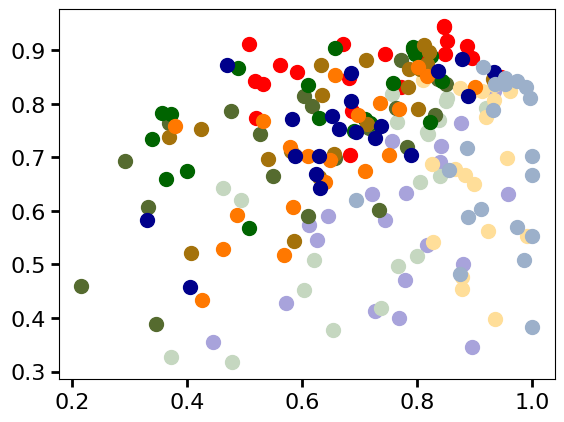

clsKcore


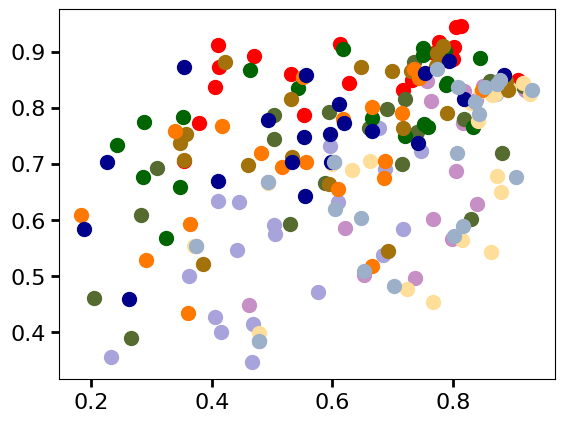

KMcore_g1


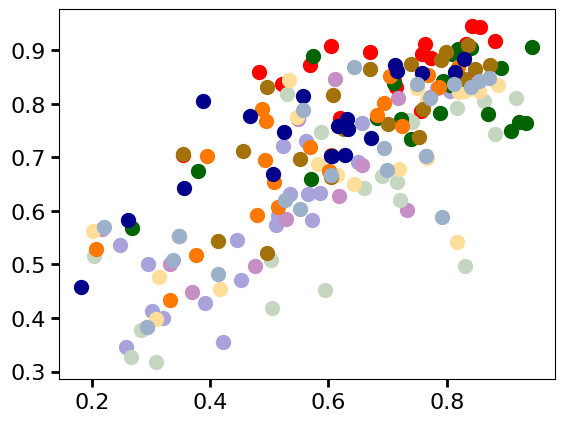

KMcore_gf


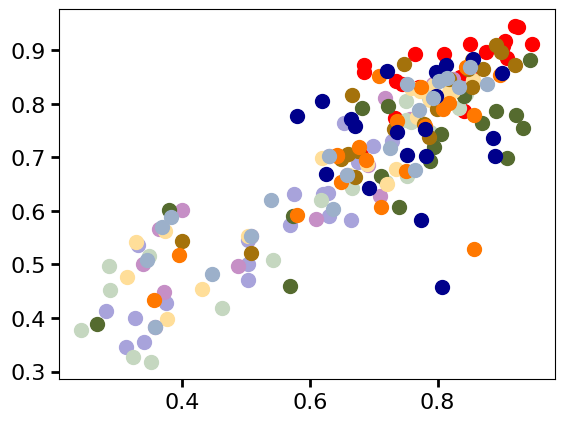

clsEigenvector


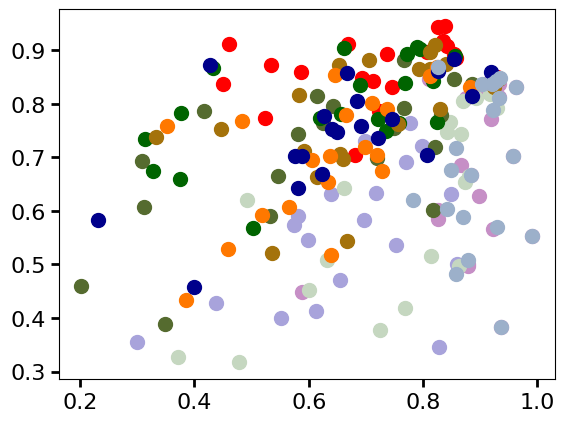

nodeEdgeEigenvector_linear


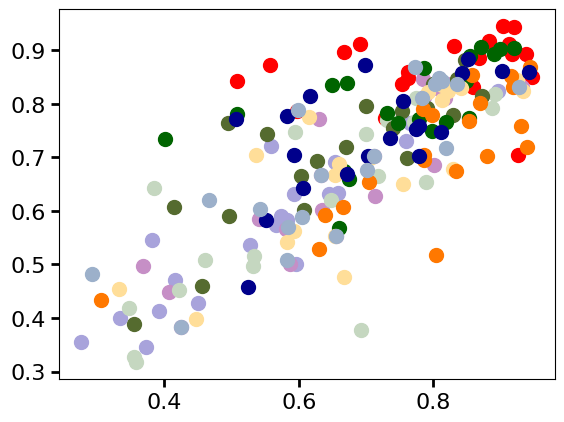

nodeEdgeEigenvector_max


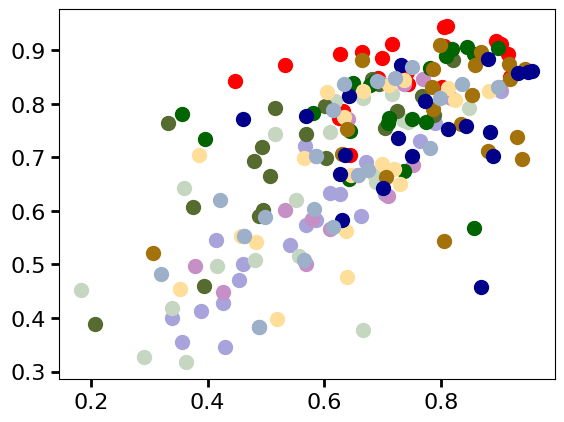

degree


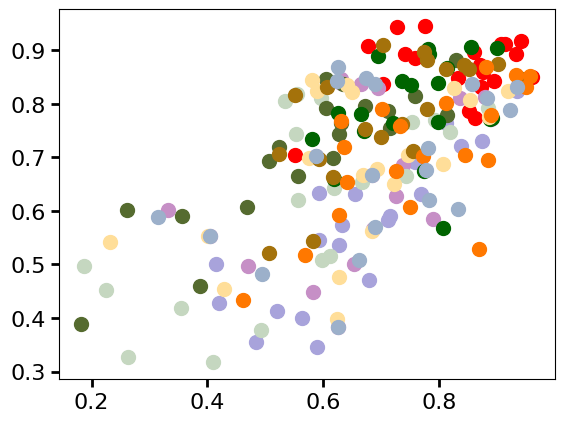

neiNodesNum


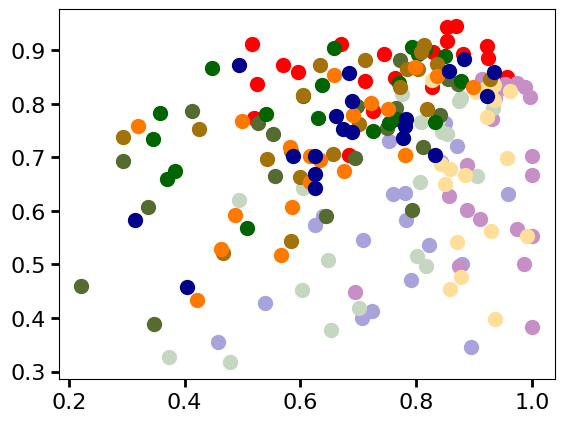

In [8]:
# SI

s1 = 100
s2 = 75
marker = 'x'
mu = 0.1
xstickD = dict()
ystickD = dict()
methods_plt = ['new_neiNodeSum_1', 'clsBetweenness', 'clsCloseness', 
               'clsKcore',  'KMcore_g1', 'KMcore_gf',
            'clsEigenvector','nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
             'degree','neiNodesNum', ] 
labels = {'new_neiNodeSum_1':'MIS', 
          'degree':'Degree',
          'clsBetweenness':'Betweenness', 
          'clsCloseness':'Closeness', 
          'clsKcore':'K-coreness', 
          'clsEigenvector':'Eigenvector', 
          'KMcore_g1':'H-coreness-R', 
          'KMcore_gf':'H-coreness-$R_w$', 
          'neiNodesNum':'NNum', 
          'nodeEdgeEigenvector_linear':'NEE_linear', 
          'nodeEdgeEigenvector_max':'NEE_max',
          }
labelsshow = {'new_neiNodeSum_1':'MIS$_{t=1}^{HC}$', 
          'degree':'Hyper-degree',
          'clsBetweenness':'2-Betweenness', 
          'clsCloseness':'2-Closeness', 
          'clsKcore':'2-K-coreness', 
          'clsEigenvector':'2-Eigenvector', 
          'KMcore_g1':'Hyper-coreness-R', 
          'KMcore_gf':'Hyper-coreness-$R_w$', 
          'neiNodesNum':'2-Degree', 
          'nodeEdgeEigenvector_linear':'Eigenvector_linear', 
          'nodeEdgeEigenvector_max':'Eigenvector_linear',
           }
colors = {'new_neiNodeSum_1':'red', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          }
xstickD = dict()
ystickD = dict()
# plt.figure(figsize=(5,5))  # ,dpi=300
for mtd_ in methods_plt:  # ['new_neiNodeSum_1']:
    # plt.figure(figsize=(7,5))
    methods_copy = copy.deepcopy(methods_plt)
    methods_copy.remove(mtd_)
    methods_others = methods_copy
    tauDic = dict()
    tauDic_ms = dict()
    sctterDic= dict()
    xstickD[mtd_] = dict() 
    ystickD[mtd_] = dict()
    for mid, mtd in enumerate(methods_others):
    # for mid, mtd in enumerate(['KMcore_gf', 'neiNodesNum', 'nodeEdgeEigenvector_linear',]):
        sctterDic[mtd] = dict()
        tauDic[mtd] = dict()
        tauDic_ms[mtd] = dict()
        sctterLst_x = []
        sctterLst_y = []
        for net in range(1,21):
            tauDic[mtd][net] = round(caltau(rltDic_nc[mu][net], measuresDic[net][mtd], 'b'), 5)
            tauDic_ms[mtd][net] = round(caltau(measuresDic[net][mtd_], measuresDic[net][mtd], 'b'), 5)
            sctterDic[mtd][net] = (tauDic_ms[mtd][net], tauDic[mtd][net])
            sctterLst_x.append(tauDic_ms[mtd][net])
            sctterLst_y.append(tauDic[mtd][net])
        xstickD[mtd_][mtd] = sum(sctterLst_x)/len(sctterLst_x)
        ystickD[mtd_][mtd] = sum(sctterLst_y)/len(sctterLst_y)
        plt.scatter(sctterLst_x, sctterLst_y, label=f'{labels[mtd]}', color=colors[mtd], s=s1
                    # alpha=0.5
                    )


    plt.tick_params(axis='y', labelsize=16) 
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', which='major', size=6, width=2)  
    plt.tick_params(axis='x', which='major', size=6, width=2) 
    # plt.gca().set_xticklabels([])
    # plt.gca().set_yticklabels([])
    plt.savefig(f'savefig_all/scatters/ticks_{mtd_}.svg', format='svg', bbox_inches='tight',dpi=300)
    print(mtd_)
    plt.show()